# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [3]:
# Create Path
path = r'C:\Users\jenni\OneDrive\Documenten\Data Analyst Program\Data Analytics Immersion\Achievement 4\02-2024 Instacart Basket Analysis'

In [4]:
# Importing Dataframe
df_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_data.pkl'))

# Task

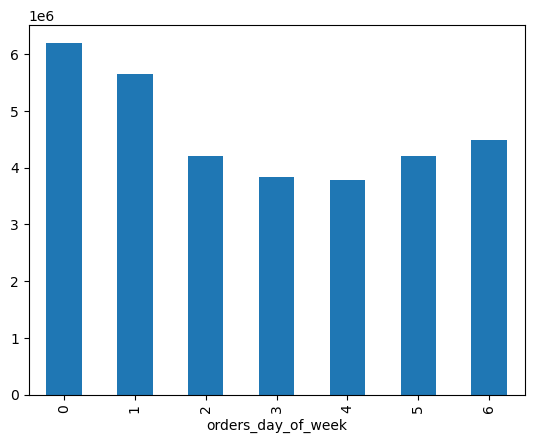

In [6]:
# Create Bar Chart
bar = df_complete['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Saving Bar Chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

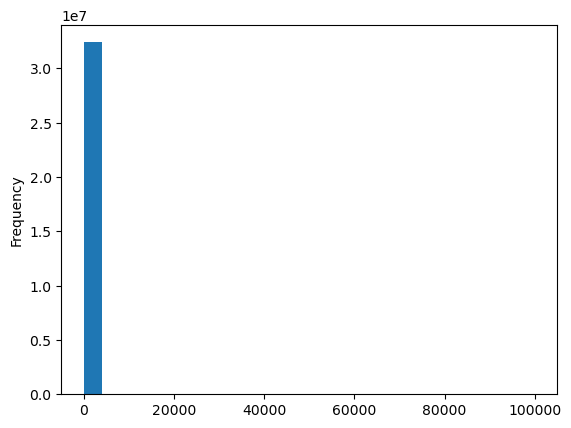

In [9]:
# Create Histogram
df_complete['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

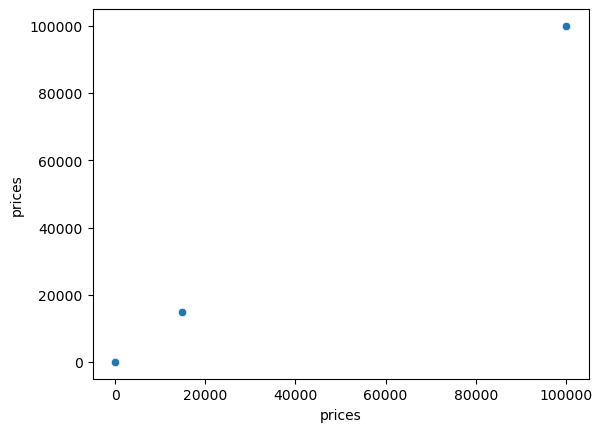

In [11]:
# Create Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_complete)

In [28]:
df_complete.loc[df_complete['prices'] > 100]

Empty DataFrame
Columns: [order_id, user_id, order_number, orders_day_of_week, orders_hour_of_day, days_since_prior_order, product_id, add_to_cart_order, reordered, product_name, aisle_id, department_id, prices, price_range_loc, busiest_day, busiest_days, busiest_period_of_day, hour_of_day_counts, max_order, loyalty_flag, loyalty, spender_type, order_frequency, first_name, surname, gender, state, age, date_joined, fam_status, income, _merge]
Index: []

In [29]:
# Ensuring all columns are displayed
pd.options.display.max_columns = None

In [16]:
# Mark extremely high values as missing
df_complete.loc[df_complete['prices'] > 100, 'prices'] = np.nan

In [17]:
# Checking maximum value
df_complete['prices'].max()

25.0

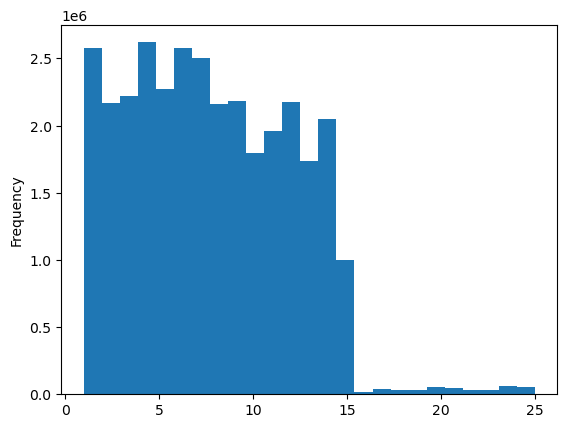

In [18]:
# Making new Histogram
hist = df_complete['prices'].plot.hist(bins = 25)

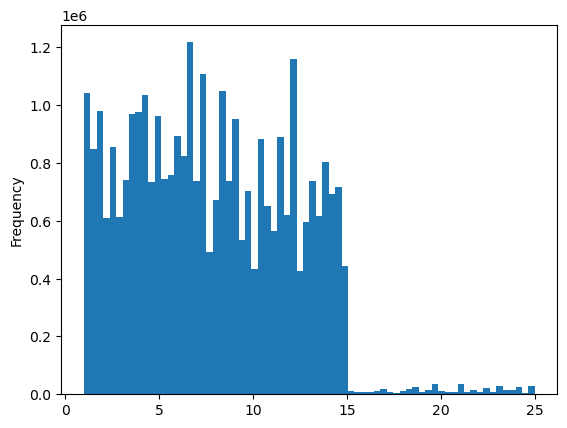

In [19]:
hist_2 = df_complete['prices'].plot.hist(bins = 70)

In [20]:
# Saving Histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_prices.png'))

In [21]:
# Create random samples
np.random.seed(4)
dev = np.random.rand(len(df_complete)) <= 0.7

In [22]:
# Store 70% of sample in dataframe big
big = df_complete[dev]

# Store 30% of sample in dataframe small
small = df_complete[~dev]

In [23]:
len(df_complete)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
df_2 = small[['orders_day_of_week','prices']]

In [26]:
df_2.head()

orders_day_of_week  prices
0                    2     9.0
2                    3     9.0
3                    4     9.0
6                    1     9.0
10                   2    12.5

C:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


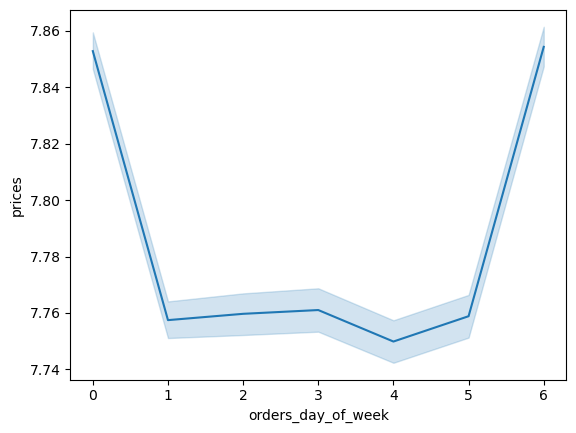

In [27]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y= 'prices')

## Hour of Day Histogram

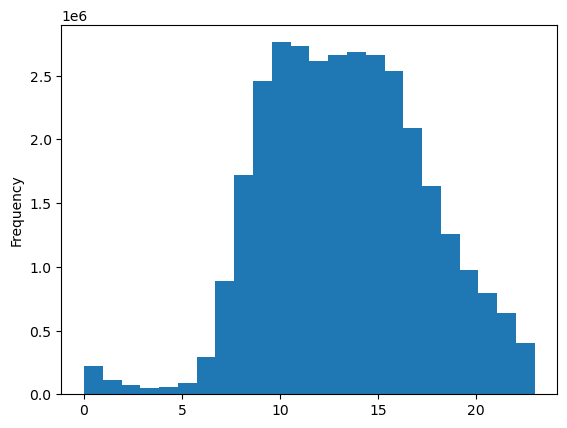

In [31]:
# Making Histogram
hist_hod = df_complete['orders_hour_of_day'].plot.hist(bins = 24)

The histogram shows the peak hours of orders. It seems logical as the least busy hours are at night when most people are asleep, and the busiest during the day

In [32]:
# Saving Histogram
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hod.png'))

## Loyalty Ordering Bar Chart

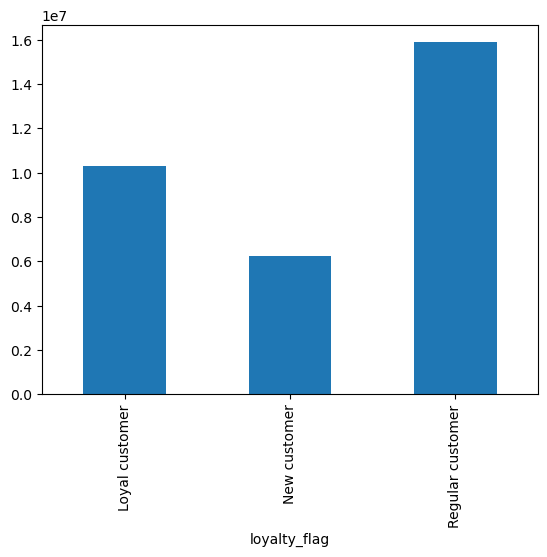

In [35]:
bar_loyal = df_complete['loyalty_flag'].value_counts().sort_index().plot.bar()

In [36]:
# Saving Bar Chart
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal.png'))

## Expenditure Hour of Day Line Chart

In [40]:
# Creating new Subset for line chart
df_3 = small[['orders_hour_of_day','prices']]

C:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


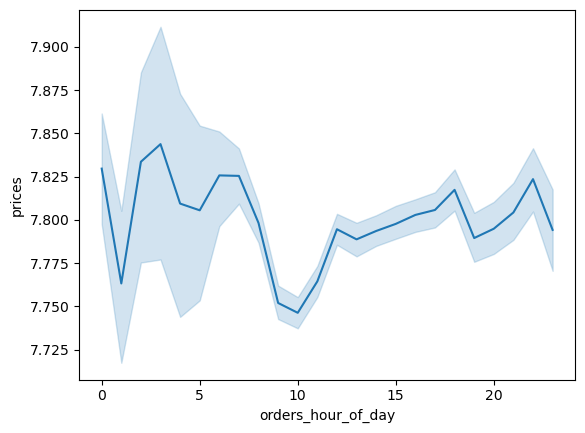

In [44]:
# Creating line chart
line_expenditure = sns.lineplot(data = df_3, x = 'orders_hour_of_day', y= 'prices')

The line chart shows that expenditure takes a dip during the busiest hour of the day (10AM), and is highest during th eleast busy hours (duting the night)

In [57]:
# Saving the Line Chart
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure.png'))

## Customer Demographics Line Chart

In [48]:
df_complete['fam_status'].value_counts()

fam_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [45]:
# Creating new Subset for Line Chart
df_4 = small[['age', 'fam_status']]

C:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


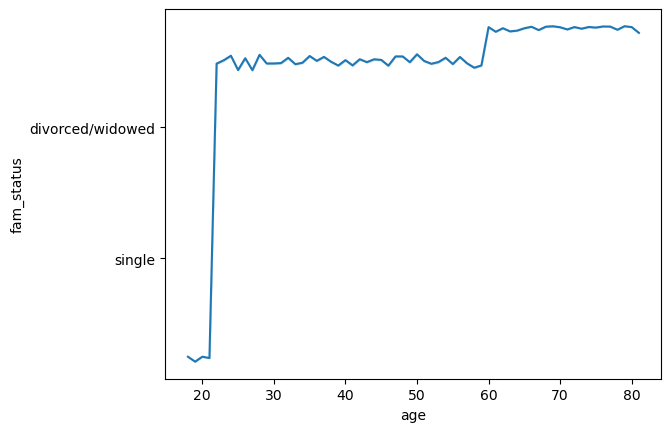

In [46]:
# Creating Customer Demographics line chart
line_expenditure = sns.lineplot(data = df_4, x = 'age', y= 'fam_status')

As the above line chart is not clear, I opted for a box plot instead

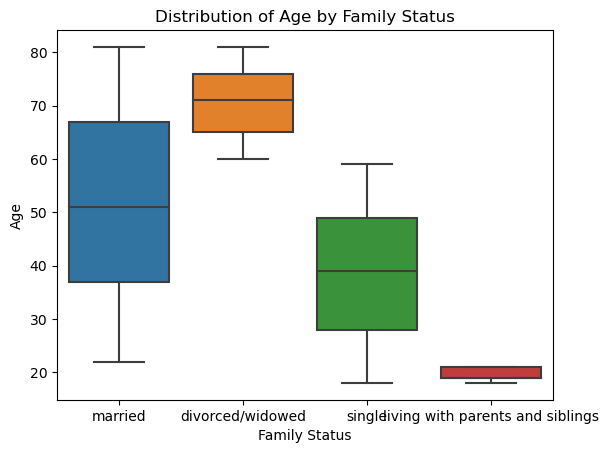

In [59]:
# Creating Box Plot for Customer Demographics
boxplot_dem = sns.boxplot(data=df_4, x='fam_status', y='age')
plt.xlabel('Family Status')
plt.ylabel('Age')
plt.title('Distribution of Age by Family Status')
plt.show()

The Box Plot shows that the younger customers are more likely to be single or living with parents and siblings, whereas the older customers are either married or divorced

In [60]:
# Saving the Box Plot
boxplot_dem.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_dem.png'))

## Age Vs. Spending Power Scatterplot

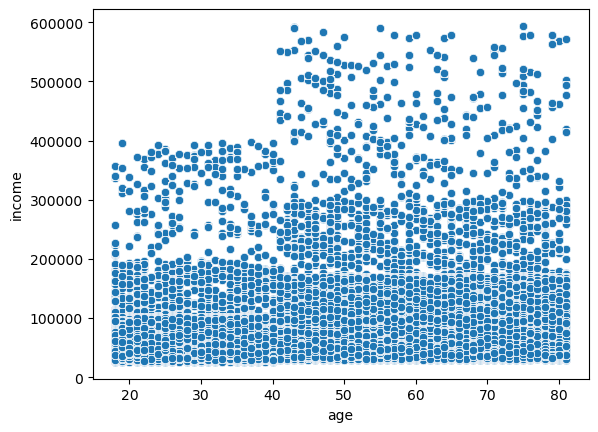

In [61]:
# Create Scatterplot
scatterplot_spendpwr = sns.scatterplot(x = 'age', y = 'income',data = df_complete)

There seems to be no correlation betweeen age and income

In [62]:
# Saving the Scarrerplot
scatterplot_spendpwr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_spendpwr.png'))